In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

files =['data/anonymization_adult-NN2.npy',
        'data/anonymization_adult-NN2-Qi6.npy',
        'data/anonymization_adult-NN2-Qi8.npy',
        'data/anonymization_adult-NN2-Qi10.npy']

res = [np.load(f, allow_pickle=True) for f in files]

In [2]:
res_per_method = {k:[qi_res[1][k] for qi_res in res] for k in res[1][1].keys()}

In [3]:
qi_legends = ['4 QI', '6 QI', '8 QI', '10 QI']
k_trials = (10, 20, 50, 100, 200, 500, 1000)
markers = ['-s', '-^', '-o', '-<']

In [4]:
len(res_per_method['AG'][0])

7

In [5]:
res[0][0][:,0]

array([[0.8372336 , 0.68001204, 0.58736349, 0.63030134, 0.88553325],
       [0.8360666 , 0.66479978, 0.61726469, 0.640151  , 0.88532591],
       [0.8360666 , 0.65739503, 0.63910556, 0.64812129, 0.88909273],
       [0.83410108, 0.66031924, 0.61310452, 0.63583659, 0.88523972],
       [0.83594376, 0.66180116, 0.62480499, 0.64277116, 0.88672369],
       [0.837295  , 0.67733333, 0.59438378, 0.6331533 , 0.88511444],
       [0.83422393, 0.66390397, 0.60400416, 0.63253914, 0.88452629],
       [0.83815491, 0.67647916, 0.60348414, 0.63790023, 0.88513975],
       [0.832627  , 0.65955024, 0.6024441 , 0.62970512, 0.88427175],
       [0.83354831, 0.65561644, 0.62220489, 0.63847385, 0.88381431]])

In [10]:
def plot_mean_std(x, acc, m, k, ylim_min, ylim_max, color=None):
    accmean = acc.mean(axis=1)
    plt.xscale('log')
    plt.ylim(ylim_min, ylim_max)
    
    if color is None:
        ln = plt.plot(x, accmean, m, fillstyle='none', label=k)[0]
        plt.fill_between(x, accmean + acc.std(axis=1), accmean - acc.std(axis=1), color=ln.get_color(), alpha=0.5)
    else:
        ln = plt.plot(x, accmean, m, fillstyle='none', label=k, color=color)[0]
        plt.fill_between(x, accmean + acc.std(axis=1), accmean - acc.std(axis=1), color=color, alpha=0.5)

    return ln


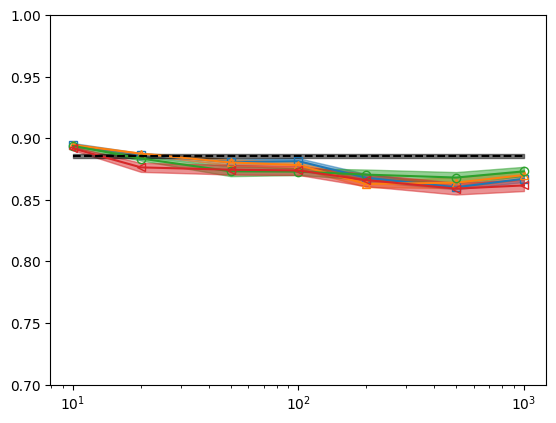

In [11]:
res_AG = res_per_method['AG']
mes_id = 4
ylim_min = 0.7
ylim_max = 1.0

lns_qi = [plot_mean_std(k_trials, np.array(acc)[:,:,0,mes_id], m, k, ylim_min, ylim_max) for (k, acc, m) in zip(qi_legends, res_AG, markers)]

lns_vanilla = plot_mean_std(k_trials, np.dot(np.ones_like(k_trials)[:,np.newaxis], res[0][0][:,0,mes_id][np.newaxis,:]),
                            '--', "Base line", ylim_min, ylim_max, color='black')

lns = lns_qi + [lns_vanilla]
legend = plt.legend(lns, qi_legends, loc=3, framealpha=1, frameon=True, ncol=4, bbox_to_anchor=(1.0, -0.05))

#export_legend(legend, 'plots/legend_QIs')
legend.remove()

plt.savefig('plots/inference/anonymization_adult-NN2-QIs_AG.png')

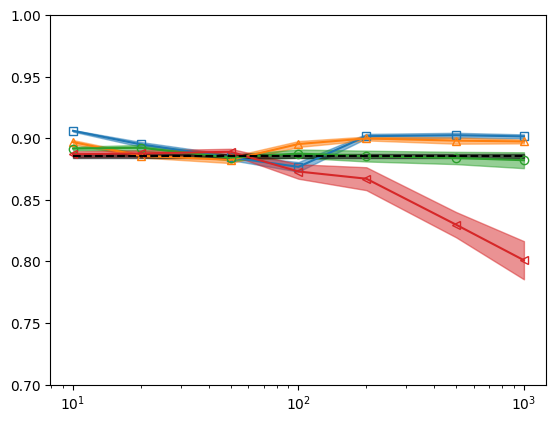

In [13]:
res_AG = res_per_method['Mondrian']

lns_qi = [plot_mean_std(k_trials, np.array(acc)[:,:,0,mes_id], m, k, ylim_min, ylim_max) for (k, acc, m) in zip(qi_legends, res_AG, markers)]

lns_vanilla = plot_mean_std(k_trials, np.dot(np.ones_like(k_trials)[:,np.newaxis], res[0][0][:,0,mes_id][np.newaxis,:]),
                            '--', "Base line", ylim_min, ylim_max, color='black')
#plt.legend()
plt.savefig('plots/inference/anonymization_adult-NN2-QIs_Mondrian.png')

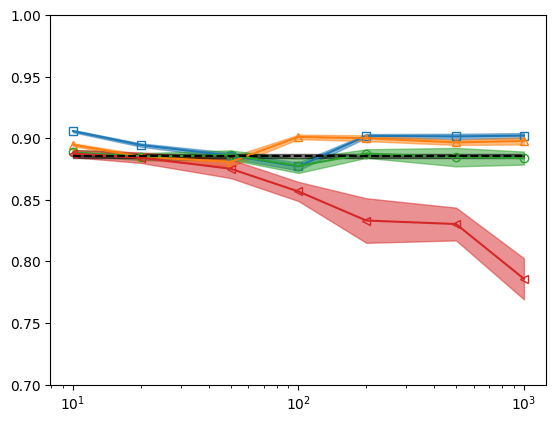

In [14]:
res_AG = res_per_method['l-diverse']

lns_qi = [plot_mean_std(k_trials, np.array(acc)[:,:,0,mes_id], m, k, ylim_min, ylim_max) for (k, acc, m) in zip(qi_legends, res_AG, markers)]

lns_vanilla = plot_mean_std(k_trials, np.dot(np.ones_like(k_trials)[:,np.newaxis], res[0][0][:,0,mes_id][np.newaxis,:]),
                            '--', "Base line", ylim_min, ylim_max, color='black')

plt.savefig('plots/inference/anonymization_adult-NN2-QIs_l-diverse.png')

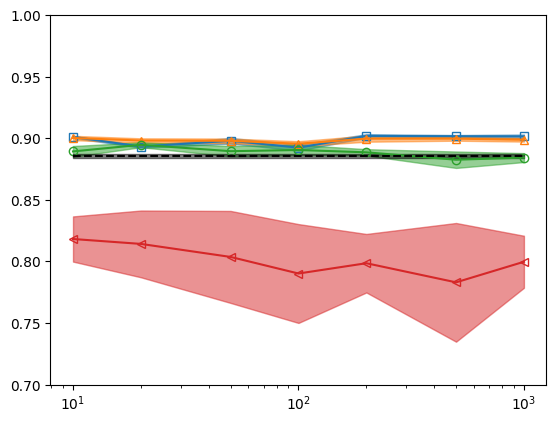

In [15]:
res_AG = res_per_method['t-closeness']

lns_qi = [plot_mean_std(k_trials, np.array(acc)[:,:,0,mes_id], m, k, ylim_min, ylim_max) for (k, acc, m) in zip(qi_legends, res_AG, markers)]

lns_vanilla = plot_mean_std(k_trials, np.dot(np.ones_like(k_trials)[:,np.newaxis], res[0][0][:,0,mes_id][np.newaxis,:]),
                            '--', "Base line", ylim_min, ylim_max, color='black')

plt.savefig('plots/inference/anonymization_adult-NN2-QIs_t-closeness.png')